In [21]:
import pandas as pd
import xgboost as xgb

# this allows plots to appear directly in the notebook
%matplotlib inline

# data columns used for the booster
factors = ['property_id', 'bedrooms', 'bathrooms', 'sqft','longitude', 'latitude','zipcode', 'elevation', 'garage'
                          ,'year_built', 'level','dist_to_park','dist_to_golf_course', 'has_pool'
                          ,'date_closed','multifamily', 'hoa_fees', 'lot']


In [4]:
# load PHX homes for sale
for_sale = pd.read_csv('CSV_backups/PH-for_sale.csv')
# load PHX sales model
bst = xgb.Booster(model_file='/home/ilya/rentalnerd-models/ph_sales_20170220.model')

In [12]:
dtrain = xgb.DMatrix(for_sale[factors].values, label=for_sale.price, feature_names=factors)
ypred = bst.predict(dtrain).astype(int)


In [29]:
df = pd.concat([pd.Series(ypred,name="ypred"), for_sale.price, for_sale[factors]], axis=1)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9910829a90>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f991050fb00>]], dtype=object)

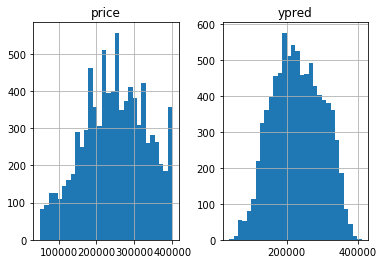

In [49]:
df[['ypred','price']].hist(bins=30)


Average list price / estimated value: 0.06726597715939504


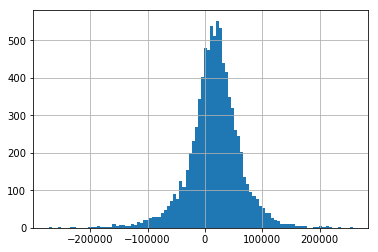

In [47]:
print("Average list price / estimated value:", (df['price'] - df['ypred']).mean() / df['price'].mean())
(df['price'] - df['ypred']).hist(bins=100)

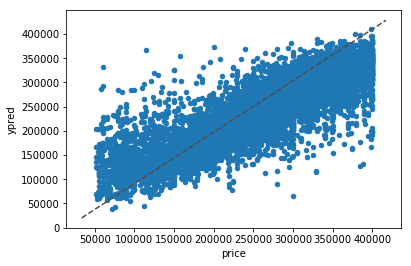

In [44]:
ax = df.plot(kind='scatter', x='price', y='ypred')
ax.plot(ax.get_xlim(), ax.get_ylim(), ls="--", c=".3")

In [55]:
per_foot = pd.Series(df.price / df.sqft, name='per_foot_ask')
per_foot_est = pd.Series(df.ypred / df.sqft, name='per_foot_est')
df = pd.concat([ per_foot, per_foot_est, df], axis=1)

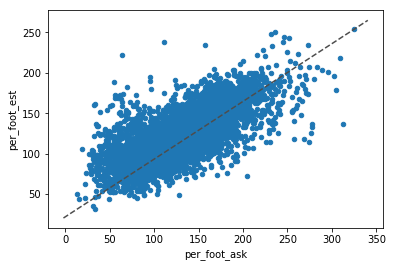

In [59]:
ax = df[df.sqft > 1000].plot(kind='scatter', x='per_foot_ask', y='per_foot_est')
ax.plot(ax.get_xlim(), ax.get_ylim(), ls="--", c=".3")

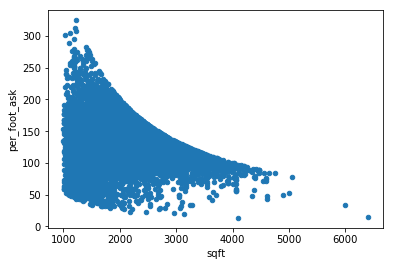

In [61]:
ax = df[df.sqft > 1000].plot(kind='scatter', x='sqft', y='per_foot_ask')

In [66]:
tgt = df[df.ypred > (df.price + 20000)]

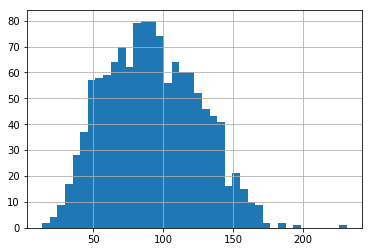

In [74]:
tgt[tgt.sqft > 1000].per_foot_ask.hist(bins=40)

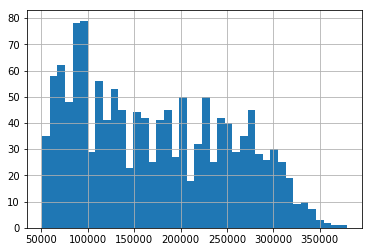

In [73]:
tgt.price.hist(bins=40)